생성된 총 재고 수: 148
재고 목록:
Product_1: (25, 25)
Product_2: (15, 15)
Product_3: (5, 5)
Product_4: (25, 25)
Product_5: (20, 20)
Product_6: (5, 5)
Product_7: (25, 25)
Product_8: (20, 20)
Product_9: (10, 10)
Product_10: (5, 5)
Product_11: (5, 5)
Product_12: (5, 5)
Product_13: (5, 5)
Product_14: (5, 5)
Product_15: (5, 5)
Product_16: (20, 20)
Product_17: (25, 25)
Product_18: (10, 10)
Product_19: (10, 10)
Product_20: (25, 25)
Product_21: (25, 25)
Product_22: (5, 5)
Product_23: (5, 5)
Product_24: (5, 5)
Product_25: (10, 10)
Product_26: (5, 5)
Product_27: (5, 5)
Product_28: (15, 15)
Product_29: (20, 20)
Product_30: (5, 5)
Product_31: (5, 5)
Product_32: (10, 10)
Product_33: (10, 10)
Product_34: (20, 20)
Product_35: (25, 25)
Product_36: (25, 25)
Product_37: (25, 25)
Product_38: (15, 15)
Product_39: (25, 25)
Product_40: (20, 20)
Product_41: (15, 15)
Product_42: (5, 5)
Product_43: (25, 25)
Product_44: (20, 20)
Product_45: (10, 10)
Product_46: (5, 5)
Product_47: (25, 25)
Product_48: (10, 10)
Product_49: 

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dladn\\OneDrive\\바탕 화면\\jongsul\\Initial Allocation.png'

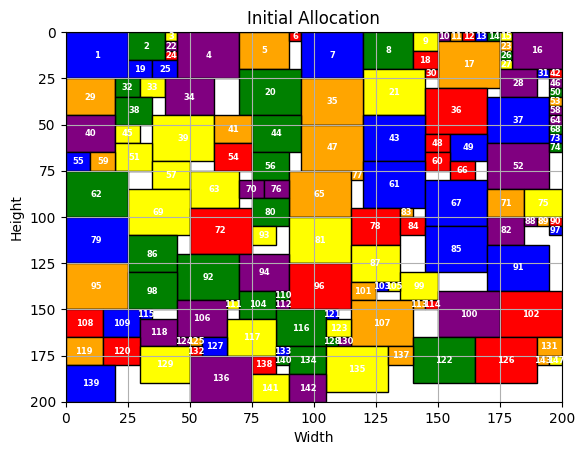

In [1]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image

# 창고 크기 입력
warehouse_columns = int(input("창고의 가로 크기(n)를 입력하세요: "))
warehouse_rows = int(input("창고의 세로 크기(m)를 입력하세요: "))
warehouse_size = warehouse_columns * warehouse_rows  # 창고의 총 면적
target_area = warehouse_size * 0.95  # 창고 면적의 95%에 해당하는 목표 재고 총 면적

# 다섯 가지 크기를 미리 정의
predefined_sizes = [(5, 5), (10, 10), (15, 15), (20, 20), (25, 25)]

# 각 크기의 비율을 랜덤하게 설정
size_ratios = [random.uniform(0.1, 0.3) for _ in range(len(predefined_sizes))]
# 비율의 합이 1이 되도록 정규화
size_ratios = [ratio / sum(size_ratios) for ratio in size_ratios]

# 재고 생성
total_area = 0
product_sizes = {}
product_id = 1

# 목표 면적을 만족할 때까지 재고를 추가
while total_area < target_area:
    # 크기 선택: 설정된 비율을 기반으로 무작위 선택
    size_index = random.choices(range(len(predefined_sizes)), weights=size_ratios, k=1)[0]
    width, height = predefined_sizes[size_index]
    item_area = width * height

    # 재고 추가 (수량은 항상 1)
    product_sizes[f'Product_{product_id}'] = (width, height)
    total_area += item_area
    product_id += 1

# 초기 생성된 재고 수
initial_product_count = len(product_sizes)

# 결과 확인
print(f"생성된 총 재고 수: {initial_product_count}")
print("재고 목록:")
for product, size in product_sizes.items():
    print(f"{product}: {size}")

'''
# 재고의 최소 및 최대 가로, 세로 크기 (5, 30으로 고정)
min_width, max_width = 5, 30
min_height, max_height = 5, 30

# 재고 생성
total_area = 0
product_sizes = {}
product_id = 1

while total_area < target_area:
    width = random.randint(min_width, max_width)
    height = random.randint(min_height, max_height)
    item_area = width * height

    # 재고 추가 (수량은 항상 1)
    product_sizes[f'Product_{product_id}'] = (width, height)
    total_area += item_area
    product_id += 1

# 초기 생성된 재고 수
initial_product_count = len(product_sizes)
'''

# 스카이라인 알고리즘을 이용한 배치 및 행렬 생성 함수
def arrange_skyline_matrix(product_sizes, removed_products, warehouse_columns, warehouse_rows, title="Initial Allocation"):
    """스카이라인을 이용하여 물건을 배치하며, 제거된 물건은 빈 공간으로 표시"""
    placement_algorithm = [0] * warehouse_columns  # 창고 가로 길이에 맞는 스카이라인 초기화
    matrix = np.zeros((warehouse_rows, warehouse_columns), dtype=int)  # 창고 상태를 저장할 행렬
    placed_items_count = 0  # 실제 배치된 재고 수를 카운트할 변수 추가

    fig, ax = plt.subplots(1)
    ax.set_xlim(0, warehouse_columns)
    ax.set_ylim(0, warehouse_rows)

    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

    used_area = 0

    for i, (product, (width, height)) in enumerate(product_sizes.items(), 1):
        # 스카이라인의 가장 낮은 위치 찾기
        min_x = -1
        min_height = warehouse_rows
        for x in range(warehouse_columns - width + 1):
            max_height_in_range = max(placement_algorithm[x:x + width])
            if max_height_in_range < min_height:
                min_height = max_height_in_range
                min_x = x

        # 물건을 가장 낮은 위치에 배치
        if min_height + height <= warehouse_rows:  # 세로 공간이 충분할 경우
            current_y = min_height
            current_x = min_x

            # 스카이라인 업데이트
            for x in range(current_x, current_x + width):
                placement_algorithm[x] = current_y + height

            # 물건 배치
            if product not in removed_products:
                # 행렬에 물건 ID로 표시
                matrix[current_y:current_y + height, current_x:current_x + width] = i
                used_area += width * height  # 사용된 면적 계산
                placed_items_count += 1  # 배치된 재고 수 업데이트
                # 시각화에서도 물건을 배치
                rect = patches.Rectangle((current_x, current_y), width, height, linewidth=1, edgecolor='black',
                                         facecolor=colors[i % len(colors)])
                ax.add_patch(rect)
                # 중앙에 번호 표시
                ax.text(current_x + width / 2, current_y + height / 2, str(i), color="white", weight="bold", fontsize=6,
                        ha="center", va="center")

    # 그래프 설정
    plt.title(title)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(True)
    plt.gca().invert_yaxis()  # 그래프의 y축 방향을 뒤집어서 행렬과 일치하게 표시
    plt.savefig(f"C:/Users/dladn/OneDrive/바탕 화면/jongsul/{title}.png")
    plt.show()

    print(f"{title} - 배치된 재고 수: {placed_items_count}")
    print(f"사용된 면적: {used_area} / {warehouse_size}")
    print("배치된 창고 상태 행렬:")
    print(matrix)
    print("-----------------------------------------------------------------------------------------------------")
    print("\n")
    
    return matrix


# 전체 재고 면적 계산
current_total_area = sum(width * height for width, height in product_sizes.values())

# 제거할 목표 면적 계산 (30% 제거)
remove_target_area = current_total_area * 0.30
removed_area = 0

# 임의로 재고를 제거하며 면적 줄이기
remaining_products = product_sizes.copy()
removed_products = []
while removed_area < remove_target_area and remaining_products:
    # 재고 중 하나를 임의로 선택
    product_to_remove = random.choice(list(remaining_products.keys()))
    width, height = remaining_products.pop(product_to_remove)
    removed_area += width * height
    removed_products.append(product_to_remove)

# 접촉 면적 비율 계산 함수
def calculate_contact_ratios(matrix):
    """
    각 재고의 접촉 면적 비율을 계산하여 반환합니다.
    matrix: 창고 내 재고 배치 상태를 나타내는 행렬
    """
    contact_ratios = []
    rows, cols = matrix.shape

    # 각 제품별로 빈 공간과 다른 제품과의 접촉 면적을 계산
    for product_id in np.unique(matrix):
        if product_id == 0:  # 0은 빈 공간을 의미하므로 스킵
            continue

        product_positions = np.argwhere(matrix == product_id)
        contact_with_others = 0
        total_perimeter = 0

        # 제품 위치마다 상하좌우를 탐색하여 접촉 상태 확인
        for (row, col) in product_positions:
            # 각 위치의 주변을 탐색
            for d_row, d_col in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                n_row, n_col = row + d_row, col + d_col

                # 경계를 벗어나지 않는지 확인
                if 0 <= n_row < rows and 0 <= n_col < cols:
                    neighbor_id = matrix[n_row, n_col]
                    if neighbor_id == 0:  # 빈 공간이면
                        total_perimeter += 1
                    elif neighbor_id != product_id:  # 다른 제품이면
                        contact_with_others += 1
                        total_perimeter += 1
                else:
                    # 창고 경계면에 위치할 경우 접촉 면적 추가
                    total_perimeter += 1

        # 비율 계산: 다른 제품과의 접촉 면적 / 총 둘레
        ratio = contact_with_others / total_perimeter if total_perimeter > 0 else 0
        contact_ratios.append((product_id, ratio))

    # 결과를 데이터프레임으로 변환
    df_contact_ratios = pd.DataFrame(contact_ratios, columns=["Product ID", "Contact Ratio"])
    df_contact_ratios = df_contact_ratios.sort_values(by="Contact Ratio")

    # 하위 10% 추출
    lower_10_percent = df_contact_ratios.head(max(1, int(len(df_contact_ratios) * 0.1)))

    return lower_10_percent

# 초기 배치 시각화 및 행렬 생성
initial_matrix = arrange_skyline_matrix(product_sizes, [], warehouse_columns, warehouse_rows, title="Initial Allocation")

# 제거 후 배치 시각화 및 행렬 생성
final_matrix_after_removal = arrange_skyline_matrix(product_sizes, removed_products, warehouse_columns, warehouse_rows, title="After 30% Removal Allocation")

# 하위 10% 접촉 비율 계산 및 출력
lower_10_percent_products = calculate_contact_ratios(final_matrix_after_removal)
print("접촉 면적 비율이 낮은 하위 10% 재고 목록:")
print(lower_10_percent_products)

def visualize_after_removal(matrix, title="After lower 10% Removal"):
    """
    하위 10% 재고를 제거한 후의 창고 상태를 시각화하고 저장합니다.
    """

    #matrix에서 하위 10% 재고의 위치를 0으로 변경
    for product_id in lower_10_percent_products["Product ID"]:
        # matrix에서 해당 product_id의 위치를 모두 0으로 설정
        final_matrix_after_removal[final_matrix_after_removal == product_id] = 0

    fig, ax = plt.subplots(1)
    ax.set_xlim(0, matrix.shape[1])
    ax.set_ylim(0, matrix.shape[0])

    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
    
    for product_id in np.unique(matrix):
        if product_id == 0:
            continue  # 빈 공간은 건너뜀
        # 각 제품의 위치를 찾고 색을 입힘
        product_positions = np.argwhere(matrix == product_id)
        top_left_y, top_left_x = product_positions[0]  # 제품의 첫 위치를 가져옴
        width = np.max(product_positions[:, 1]) - top_left_x + 1
        height = np.max(product_positions[:, 0]) - top_left_y + 1

        # 제품 색과 위치 설정
        rect = patches.Rectangle((top_left_x, top_left_y), width, height, linewidth=1, edgecolor='black',
                                 facecolor=colors[product_id % len(colors)])
        ax.add_patch(rect)
        # 중앙에 번호 표시
        ax.text(top_left_x + width / 2, top_left_y + height / 2, str(product_id), color="white", weight="bold", fontsize=6,
                ha="center", va="center")

    plt.title(title)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(True)
    plt.gca().invert_yaxis()  # 그래프의 y축 방향을 뒤집어서 창고의 실제 위치와 일치하게 표시
    plt.savefig(f"C:/Users/dladn/OneDrive/바탕 화면/jongsul/{title}.png")
    plt.show()

    #print(f"{title} - 배치된 재고 수: {placed_items_count}")
    #print(f"사용된 면적: {used_area} / {warehouse_size}")
    print("배치된 창고 상태 행렬:")
    print(matrix)
    print("-----------------------------------------------------------------------------------------------------")
    print("\n")

# 하위 10% 재고 제거 후 창고 상태 시각화
visualize_after_removal(final_matrix_after_removal, title="After lower 10% Removal")

# 새로운 제품 생성
new_product_count = 50 
incoming_items = [
    (random.randint(min_width, max_width), random.randint(min_height, max_height))
    for _ in range(new_product_count)
]


# 하위 10% 재고와 새로운 재고를 BFD에 포함시켜 재배치
all_new_products = incoming_items + [product_sizes[f'Product_{product_id}'] for product_id in removed_products if f'Product_{product_id}' in product_sizes]


# BFD 알고리즘으로 새로운 제품 및 하위 10% 재고 배치
def apply_bfd_algorithm(matrix, new_items, warehouse_columns, warehouse_rows, ax, start_id):
    """
    BFD 방식을 사용하여 새 제품을 창고에 배치합니다.
    matrix: 기존 창고 상태를 나타내는 행렬
    new_items: 추가될 새 제품 리스트 (가로, 세로)
    """
    # 제품 크기를 기준으로 내림차순 정렬
    new_items = sorted(new_items, key=lambda x: x[0] * x[1], reverse=True)

    colors = ['cyan', 'magenta', 'lime', 'pink', 'orange', 'gray']

    for i, (width, height) in enumerate(new_items, 1):
        # 빈 공간 중 가장 적합한 위치 찾기
        best_x, best_y, min_waste = -1, -1, float('inf')
        for x in range(warehouse_columns - width + 1):
            for y in range(warehouse_rows - height + 1):
                # 현재 위치에서의 낭비 공간 계산
                occupied_space = np.sum(matrix[y:y + height, x:x + width] > 0)
                waste = (width * height) - occupied_space

                # 낭비가 최소인 위치 업데이트
                if waste < min_waste and occupied_space == 0:
                    min_waste = waste
                    best_x, best_y = x, y

        # 최적 위치에 배치
        if best_x != -1 and best_y != -1:
            matrix[best_y:best_y + height, best_x:best_x + width] = start_id + i
            # 시각화에서도 추가된 물건을 배치
            rect = patches.Rectangle((best_x, best_y), width, height, linewidth=1, edgecolor='black',
                                     facecolor=colors[i % len(colors)])
            ax.add_patch(rect)
            # 중앙에 번호 표시
            ax.text(best_x + width / 2, best_y + height / 2, str(start_id + i), color="white", weight="bold", fontsize=6,
                    ha="center", va="center")

    return matrix

# 최종 창고 상태 시각화 함수
def show_final_allocation(matrix, ax, title):
    """
    최종 창고 배치를 시각화합니다.
    """
    ax.set_xlim(0, matrix.shape[1])
    ax.set_ylim(0, matrix.shape[0])
    ax.invert_yaxis()  # 그래프의 y축을 뒤집어서 창고의 실제 위치와 일치하게 표시
    plt.title(title)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid(True)
    plt.savefig(f"C:/Users/dladn/OneDrive/바탕 화면/jongsul/Re-Allocation.png")
    #plt.show()

# 최종 창고 상태 시각화
fig_final, ax_final = plt.subplots(1)
final_matrix_with_new_items = apply_bfd_algorithm(final_matrix_after_removal, all_new_products, warehouse_columns, warehouse_rows, ax_final, initial_product_count)

# BFD가 적용된 최종 창고 상태 시각화
show_final_allocation(final_matrix_with_new_items, ax_final, "Final Warehouse Allocation with New Items and Bottom 10% Products")
print(f"Re-Allocation - 배치된 재고 수: {len(product_sizes) - len(removed_products)}")
#print(f"사용된 면적: {used_area} / {warehouse_size}")
print("배치된 창고 상태 행렬:")
print(final_matrix_with_new_items)


#이미지 파일 오픈 
image1 = Image.open("C:/Users/dladn/OneDrive/바탕 화면/jongsul/Re-Allocation.png")
image2 = Image.open("C:/Users/dladn/OneDrive/바탕 화면/jongsul/After lower 10% Removal.png")

# image2의 투명도 설정 (50%)
image2 = image2.convert("RGBA")  # RGBA 모드로 변환
alpha = 128  # 50% 투명도 (0은 완전 투명, 255는 불투명)
image2_with_alpha = image2.copy()
image2_with_alpha.putalpha(alpha)

# 두 이미지를 합성하여 오버레이
combined_image = Image.alpha_composite(image1.convert("RGBA"), image2_with_alpha)

# 결과 저장 또는 출력
combined_image.save("C:/Users/dladn/OneDrive/바탕 화면/jongsul/Final.png")  # 경로에 합성된 이미지 저장
display(combined_image) # 합성된 이미지 표시

print("-----------------------------------------------------------------------------------------------------")
print("\n")